In [ ]:
%cd /content/drive/MyDrive/_main_/1_FL/asl_poses/points

/content/drive/MyDrive/_main_/1_FL/asl_poses/points


In [ ]:
import keras
keras.__version__

'2.8.0'

In [ ]:
from glob import glob
import os

import random
import numpy as np
import pandas as pd
# import polars as pl
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import adam_v2, rmsprop_v2, gradient_descent_v2
from keras.callbacks import EarlyStopping

In [ ]:
nao = datetime.datetime.now()
date_str = nao.strftime("%Y_%m_%d_%H_%M_%S")
date_str

'2022_03_30_10_08_11'

In [ ]:
ds = pd.read_csv('data.csv')
# ds.head()
ds.groupby('frase').size()

frase
bd    27
bn    29
bt    30
dtype: int64

(60, 40) (26, 40) (60, 3) (26, 3)
bd    19
bn    18
bt    23
dtype: int64

bd     8
bn    11
bt     7
dtype: int64



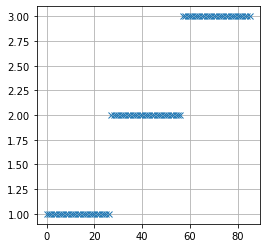

In [ ]:
X = ds.drop(columns=['frase', 'target']).values ### ai_10
# Y = ds.target.values
Y = pd.get_dummies(ds['frase'])

kl = 0.3
x_train, x_test, y_train, y_test = train_test_split(X.astype(np.float64), Y, test_size=kl, random_state=42)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

scaler = StandardScaler().fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

d_scaler = pd.DataFrame(x_train)
# d_scaler

# print((y_train==2).sum()) 
# print((y_train==1).sum()) 
# print((y_train==0).sum())

print(y_train.sum(axis=0))
print()
print(y_test.sum(axis=0))
print()
plt.figure(figsize=(4, 4))
# plt.plot(ds.target1, "x")
plt.plot(ds.target, "x")
# plt.plot(dog13.target2, "x")
# plt.yticks([i/10 for i in range(-10, 11, 5)])
# plt.yticks([i/10 for i in range(-65, 58, 5)])
plt.grid()

In [ ]:
# np.array(y_test).argmax(axis=1)

In [ ]:
ret = 40
layers = 0
model = Sequential()
model.add(Dense(ret, activation='sigmoid', input_shape=(ret,)));layers+=1
model.add(Dropout(.05))

model.add(Dense(ret*2, activation='sigmoid'));layers+=1
model.add(Dropout(.10))

model.add(Dense(ret*3, activation='sigmoid'));layers+=1
model.add(Dropout(.15))

model.add(Dense(3, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 40)                1640      
                                                                 
 dropout_3 (Dropout)         (None, 40)                0         
                                                                 
 dense_5 (Dense)             (None, 80)                3280      
                                                                 
 dropout_4 (Dropout)         (None, 80)                0         
                                                                 
 dense_6 (Dense)             (None, 120)               9720      
                                                                 
 dropout_5 (Dropout)         (None, 120)               0         
                                                                 
 dense_7 (Dense)             (None, 3)                

In [ ]:
import keras
from datetime import datetime

logdir="logs/fit/" + datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir)

opt = adam_v2.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
# opt = rmsprop_v2.RMSprop(learning_rate=0.001, rho=0.9, epsilon=1e-08, decay=0.0)
# opt = gradient_descent_v2.SGD(learning_rate=0.001, decay=0.0)
model.compile(loss='categorical_crossentropy',
              # loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

# callback= EarlyStopping(monitor='val_loss')
epochs = 100
hist = model.fit(x_train, y_train,
          epochs=epochs,
          validation_data=(x_test, y_test),
          # callbacks=[callback],
          verbose=1)

Epoch 1/100
2/2 [==============================] - 1s 176ms/step - loss: 1.2499 - accuracy: 0.2667 - val_loss: 1.1428 - val_accuracy: 0.3846
Epoch 2/100
2/2 [==============================] - 0s 40ms/step - loss: 1.1336 - accuracy: 0.3667 - val_loss: 1.1196 - val_accuracy: 0.2692
Epoch 3/100
2/2 [==============================] - 0s 31ms/step - loss: 1.0986 - accuracy: 0.4333 - val_loss: 1.1313 - val_accuracy: 0.2692
Epoch 4/100
2/2 [==============================] - 0s 29ms/step - loss: 1.1125 - accuracy: 0.3500 - val_loss: 1.1528 - val_accuracy: 0.4615
Epoch 5/100
2/2 [==============================] - 0s 30ms/step - loss: 1.0996 - accuracy: 0.3500 - val_loss: 1.1610 - val_accuracy: 0.3077
Epoch 6/100
2/2 [==============================] - 0s 26ms/step - loss: 1.0731 - accuracy: 0.4000 - val_loss: 1.1591 - val_accuracy: 0.3077
Epoch 7/100
2/2 [==============================] - 0s 25ms/step - loss: 1.1557 - accuracy: 0.3167 - val_loss: 1.1467 - val_accuracy: 0.3077
Epoch 8/100
2/2 [==

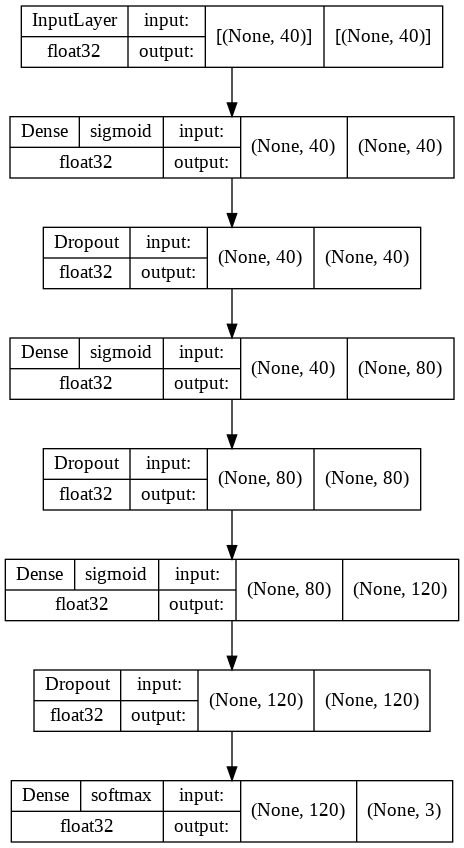

In [ ]:
import tensorflow as tf
from tensorflow.keras.utils import plot_model
plot_model(
    model,
    to_file="model.png",
    show_shapes=True,
    show_layer_names=False,
    show_dtype=True,
    show_layer_activations=True,
    rankdir='TB'
)

#     show_shapes=False,
#     show_dtype=False,
#     show_layer_names=True,
#     rankdir="TB",
#     expand_nested=False,
#     dpi=96,
#     layer_range=None,
#     show_layer_activations=False,
# )

In [ ]:
score = model.evaluate(x_test, y_test,verbose=1)
print(score)

1/1 [==============================] - 0s 20ms/step - loss: 0.2144 - accuracy: 0.9231
[0.21442413330078125, 0.9230769276618958]


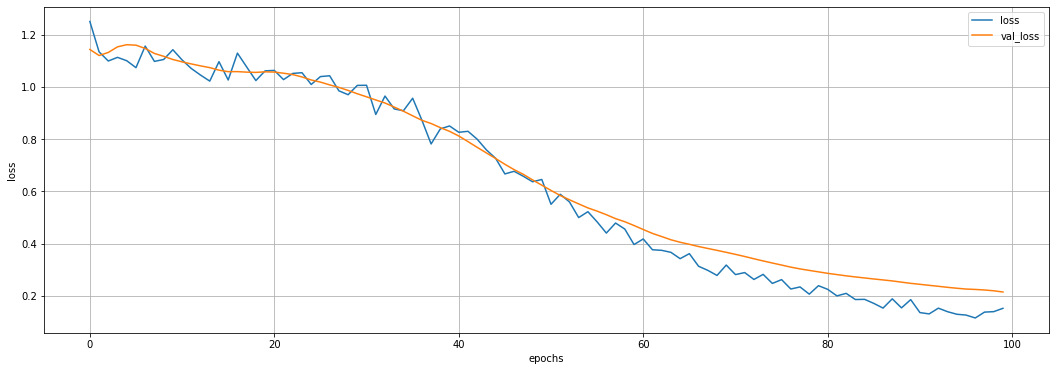

In [ ]:
plt.figure(figsize=(18, 6))
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.legend(['loss', 'val_loss'])
# plt.ylim([0, 1])
plt.xlabel("epochs")
plt.ylabel("loss")
plt.grid()
plt.savefig(f'loss_model_{date_str}.png')

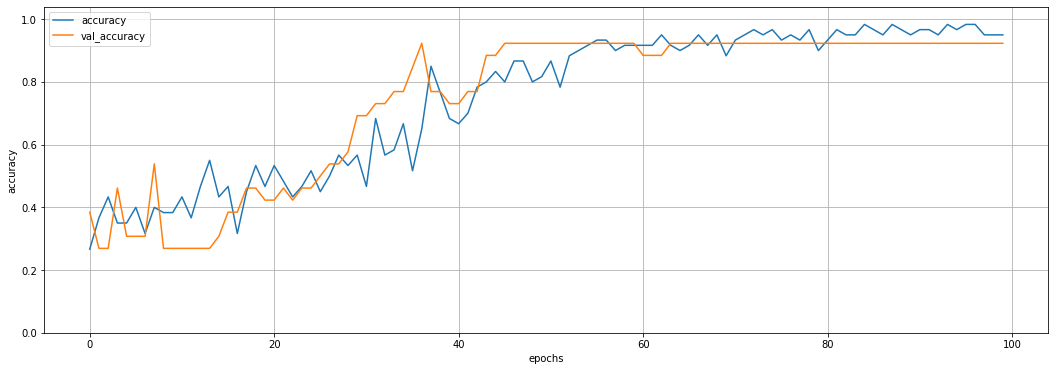

In [ ]:
plt.figure(figsize=(18, 6))
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.legend(['accuracy', 'val_accuracy'])
# plt.yticks([i/20 for i in range(0, 21)])
# plt.ylim([0.3, 1.04])
plt.ylim([0, 1.04])
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.grid()
plt.savefig(f'acc_model_{date_str}.png')

               precision    recall  f1-score   support

  buenos dias       0.89      1.00      0.94         8
buenas tardes       0.91      0.91      0.91        11
buenas noches       1.00      0.86      0.92         7

     accuracy                           0.92        26
    macro avg       0.93      0.92      0.92        26
 weighted avg       0.93      0.92      0.92        26

sign language model accuracy: 92.31 %



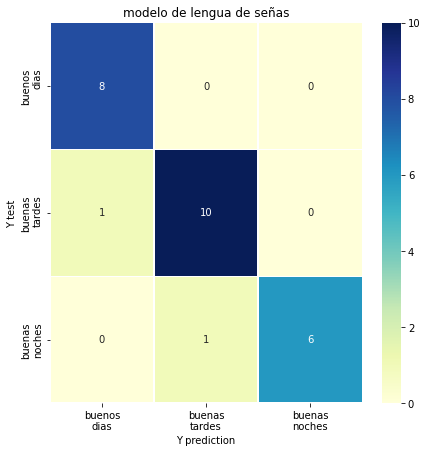

In [74]:
y_pred = model.predict(x_test)
y_pred = y_pred.argmax(axis=1)
y_actual = [y_test.iloc[i].argmax() for i in range(y_test.shape[0])]
# y_actual = Y_test

cm = confusion_matrix(list(y_actual), list(y_pred))
# cm = confusion_matrix(y_actual, y_pred)
# texto = classification_report(y_actual, y_pred, target_names=['0', '1', '2'])
texto = classification_report(list(y_actual), list(y_pred), 
                              target_names=['buenos dias', 'buenas tardes', 'buenas noches'])

# texto = classification_report(y_test, y_prediction, target_names=['0', '1', '2'])
print(texto)
print("sign language model accuracy:", f"{round(100*score[1], 2)} %\n")
# Heatmap visualization of cunfusion matrix of the Random Forest Classification Model


f, ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True, 
            linewidths=0.5, 
            # linecolor="red", 
            fmt = ".0f", ax=ax,
            xticklabels=['buenos\ndias', 'buenas\ntardes', 'buenas\nnoches'],
            yticklabels=['buenos\ndias', 'buenas\ntardes', 'buenas\nnoches'],
            cmap="YlGnBu"
            )
# plt.xticks(['buenos\ndias', 'buenas\ntardes', 'buenas\nnoches'])
# plt.yticks(['buenos\ndias', 'buenas\ntardes', 'buenas\nnoches'])
plt.title('modelo de lengua de señas')
plt.xlabel("Y prediction")
plt.ylabel("Y test")
plt.savefig(f'cm_sign_{date_str}.png')
plt.show()

In [ ]:
# model.save('model.h5')

In [ ]:
x_test[0].reshape(-1, 1).T

array([[ 0.55326106,  0.19844615,  1.02749758, -0.13413585,  0.43645453,
         0.21097467,  0.53250367, -0.17424875, -0.58045433,  0.21182865,
        -0.5275128 , -0.46838557, -1.02272791,  0.18651126,  0.93891965,
        -0.44284283, -0.0791269 , -0.45482638,  1.8404805 ,  0.94685553,
         0.07040872,  0.31034356,  1.95661003,  2.17034305,  0.12103152,
         1.25257508,  1.60315625,  1.70613232, -0.33083517, -0.1954744 ,
        -0.73730897, -0.64594813,  0.23350677,  0.91387402, -0.38304814,
        -0.22476509,  0.19475506,  0.91488022, -0.37913218, -0.24181889]])

In [ ]:
model.predict(x_test[0].reshape(-1, 1).T)

array([[0.00528534, 0.8834384 , 0.1112763 ]], dtype=float32)

In [ ]:
tensor = video2tensor(vid)
# im
### SE PROCESAN 6 FRAMES POR SEGUNDO EN LUGAR DE LOS 25-30 ORIGINALES DEL VIDEO
S = []
cont = 0
T = tensor[::6] ### se va a tomar 1 de cada 6 frames del video
for t in T:
    _, series = frame_df(t, mpPose, pose)
    S.append(series)
    cont+=1
    ccc = int_str(cont)
    # print(ccc, end="|")
    # if cont%10==0:
        # print()
ds = pd.concat(S, axis=0).reset_index().drop(columns=['index']) ### dataframe | (20, 4)
print(ds.shape)

idx = ds.shape[0]
ids = np.arange(0, idx, 2)

LX = []
for i in ids:
    i2 = i+1
    d1 = ds.iloc[i:i+1]
    d2 = ds.iloc[i2:i2+1]
    ll = pd.concat([d1, d2], axis=0).mean(axis=0)
    ll2 = ll.tolist()
    LX += ll2
    
vector = np.array(LX)[:40].reshape(-1, 1).T
preds = model.predict(vector)
ind_max = preds.argmax()

frases = ['bd', 'bt', 'bn']
print("La frase que ha dicho es:", frases[ind_max])